In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random

from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import Rung as rung

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1
import scipy.stats as st

plt.rcParams["figure.figsize"] = (20,10)


import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from scipy import stats

import PCA_functions as pf
import Extreme_functions as ef
from mpl_toolkits.basemap import Basemap

In [3]:
def uni_deseasonalize(ts,freq=12):
    ts = np.array(ts)
    N = len(ts)
    #averages = np.zeros((freq,n))
    temp = ts
    result = np.zeros((N))
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        result[Idx] = np.ravel((temp[Idx] - temp[Idx].mean())/temp[Idx].std())
    return(result)

In [4]:
def deseasonalize(t,freq=12):
    ts = np.array(t)
    N = len(t)
    #averages = np.zeros((freq,n))
    temp = t
    r = np.zeros((N))
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        r[Idx] = np.ravel((temp[Idx] - temp[Idx].mean())/temp[Idx].std())
    return(r[-1])

In [5]:
def index_maker(ts,freq=12):
    ts = np.array(ts)
    N = len(ts)
    result = []
    for i in range(360,N):
        result.append(deseasonalize(ts[i-360:i]))
    return(result)

In [127]:
d = index_maker(d)

In [129]:
len(d)

672

In [131]:
56 * 12

672

In [5]:
def crosscorr(datax, datay, lag=1):   
    return(stats.pearsonr(datax[lag:], datay[:-lag]))

In [6]:
def spi_timeseries_block(file_name, start_year = 1922, end_year=2015, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    return(ET_gamma[start_index:end_index,:])

In [54]:
temporal_limits = {"time_min":datetime(1891, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, 116, -9.96921e+36)

In [55]:
dmi = ff.timeseries_enso('dmi_1891_2015.npy',1891,2015,1891)

In [30]:
ts.shape

(1500, 116)

In [56]:
result = []
p_values = []
for i in range(57):
    r,p = st.pearsonr(ts[:,i],dmi)
    result.append(r)
    p_values.append(p)

In [57]:
result = np.array(result)

In [64]:
np.where(result> 0.28)

(array([33]),)

In [26]:
result[6]

0.4250676900141069

In [27]:
p_values[6]

7.405878922727813e-20

In [6]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")
tau = 12
f = 12
level = 99

In [7]:
temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
lon1_sst = np.arange(-180,180,2)
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[0], -9.96921e+36)

In [8]:
deg_result = np.zeros((len(lat_sst),len(lon1_sst)))

In [14]:
tau = 12
deg_result1 = np.load("../../whole_data_results/ET_orac/areas_2/corr_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))

In [15]:
level = np.ceil(np.nanmax(deg_result1)*0.7)

deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='yellow', alpha=0.4 )
    plt.gca().add_patch(poly)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


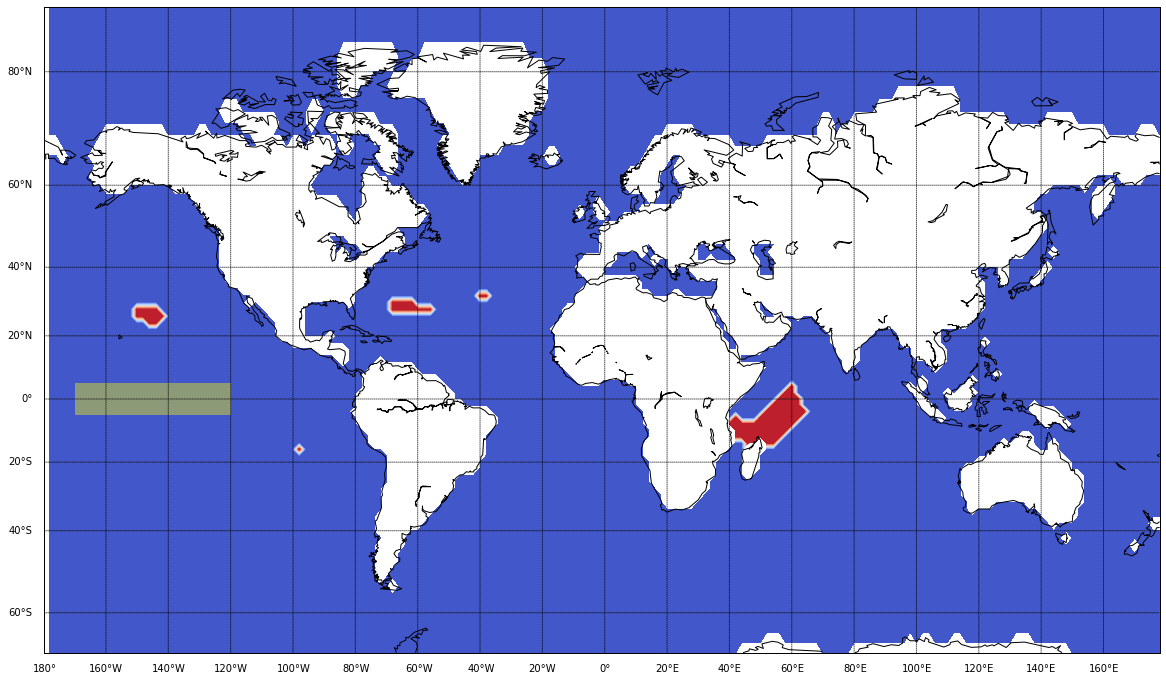

In [17]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))



lats_rect = [ -5, 5, 5, -5 ]
lons_rect = [ -170, -170, -120, -120 ]
draw_screen_poly( lats_rect, lons_rect, m )

#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("ET_CORR_{}_cut.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


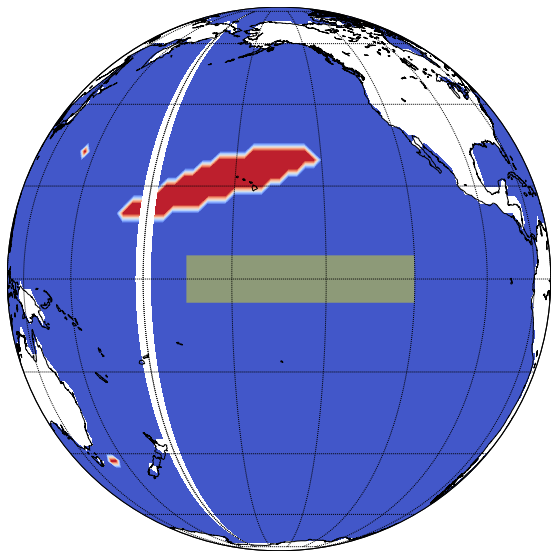

In [37]:
lon  = lon1_sst
lat = lat_sst
m = Basemap(projection='ortho',lat_0=0,lon_0=-150,resolution='l')
lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(15,10))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))

lats_rect = [ -5, 5, 5, -5 ]
lons_rect = [ -170, -170, -120, -120 ]
draw_screen_poly( lats_rect, lons_rect, m )
#plt.title(' EOF 1')
#cbar.ax.tick_params(labelsize=25)
#cbar.ax.tick_params(labelsize=30) 
#plt.colorbar()
#cbar = plt.colorbar(cs, orientation='vertical')
#cbar.ax.tick_params(labelsize=18)

In [14]:
lon1_sst = np.arange(-178,182,2)
index = deg_result > 0

index_result = np.zeros(10988, dtype=bool)

for i in range(data_sst.shape[1]):
    if not len(np.where(lon1_sst == df_sst.iloc[i,0])[0])==0:
        lon_index = np.where(lon1_sst == df_sst.iloc[i,0])[0][0]
    else:
        continue
    
    if not len(np.where(lat_sst == df_sst.iloc[i,1])[0])==0:
        lat_index = np.where(lat_sst == df_sst.iloc[i,1])[0][0]
    else:
        continue
           
    if index[lat_index,lon_index] == True:
        index_result[i] = True

In [19]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

d = result[:,index_result].mean(1)

#d = index_maker(d)
pcmci = uni_deseasonalize(d)

In [153]:
ET = spi_timeseries_block("ET_gamma_18912015_12.npy", start_year = 1960, end_year=2015,base_year = 1922)
#ET = spi_timeseries_block("ET_data_geopy.npy", start_year = 1950, end_year=2015,base_year = 1922)

In [16]:
dmi = ff.timeseries_enso('dmi.npy',1950,2015,1950)
nino = ff.timeseries_enso('nino.npy',1950,2015,1950)
oni = ff.timeseries_enso('oni.npy',1950,2015,1950)

drought,_ = ff.drought_timeseries("ET_gamma_18912015_12.npy", start_year = 1950, end_year=2015, extremes_treshold = -1, base_year = 1922)

#d1 = d[240:]
#enso = enso[121:]
#dmi = dmi[121:]
#drought = drought[121:]

In [21]:
len(d)

792

In [27]:
st.pearsonr(pcmci,oni)

(0.12080672517595722, 0.0006570089442623488)

In [29]:
st.pearsonr(pcmci,nino)

(0.08973293351911817, 0.011523220090479748)

In [211]:
level = 0.01

In [218]:
corr = []
for j in range(ET.shape[1]):
    #r, p =st.pearsonr(d1, np.ravel(ET[:,j]))
    r, p =crosscorr(np.ravel(ET[:,j]),nino,1)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [219]:
np.count_nonzero(~np.isnan(np.array(corr)))

110

In [77]:
corr

[nan,
 nan,
 nan,
 nan,
 nan,
 0.09989346984225507,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.15259854288991978,
 0.14468904275406244,
 0.08636201566556419,
 nan,
 nan,
 nan,
 0.16149395817669995,
 0.13289578867423,
 nan,
 0.07636866554536323,
 0.17491094603203705,
 0.218417202188884,
 0.16312491531978615,
 0.11079763808542861,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19024290832816537,
 0.14176106104602904,
 0.09889351144510507,
 0.1020098923282392,
 0.1321946528877703,
 0.1281303910439845,
 0.12493503135418611,
 nan,
 0.14094585928895376,
 0.10860284225850358,
 nan,
 nan,
 -0.08457096282198877,
 -0.18616472976121096,
 0.08546774793760609,
 nan,
 0.12617115284985855,
 0.0887045329084226,
 0.1337792670707655,
 0.11306412403392092,
 0.13052337450173446,
 0.1270345004750065,
 0.08996426272969084,
 -0.12732402312783764,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.178243892224439,
 -0.1641353654440407,
 nan,
 nan,
 nan,
 0.09065066855272545,
 nan,
 nan,
 0.1227299952330339,
 0.1338481876582396,
 0.137738015943

In [21]:
N = 12
df = pd.DataFrame({'drought':np.array(drought[N:]), 'pcmci':d[:-N], 'nino':nino[:-N]})

df=(df-df.mean())/df.std()

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                drought   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.19e-09
Time:                        07:45:14   Log-Likelihood:                -1085.6
No. Observations:                 780   AIC:                             2177.
Df Residuals:                     777   BIC:                             2191.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.162e-15      0.035  -9.06e-14      1.0

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [117]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                drought   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     9.445
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           9.03e-05
Time:                        07:05:06   Log-Likelihood:                -933.74
No. Observations:                 665   AIC:                             1873.
Df Residuals:                     662   BIC:                             1887.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.815e-15      0.038   4.74e-14      1.0

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
drought,_ = ff.drought_timeseries("ET_gamma_18912015_12.npy", start_year = 1930, end_year=2015, extremes_treshold = -1, base_year = 1922)

In [44]:
df = pd.DataFrame({'drought':drought[12:], 'pcmci':d[:-12] })

In [226]:
drought,_ = ff.drought_timeseries("ET_gamma_18912015_12.npy", start_year = 1995, end_year=2015, extremes_treshold = -1, base_year = 1922)


/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


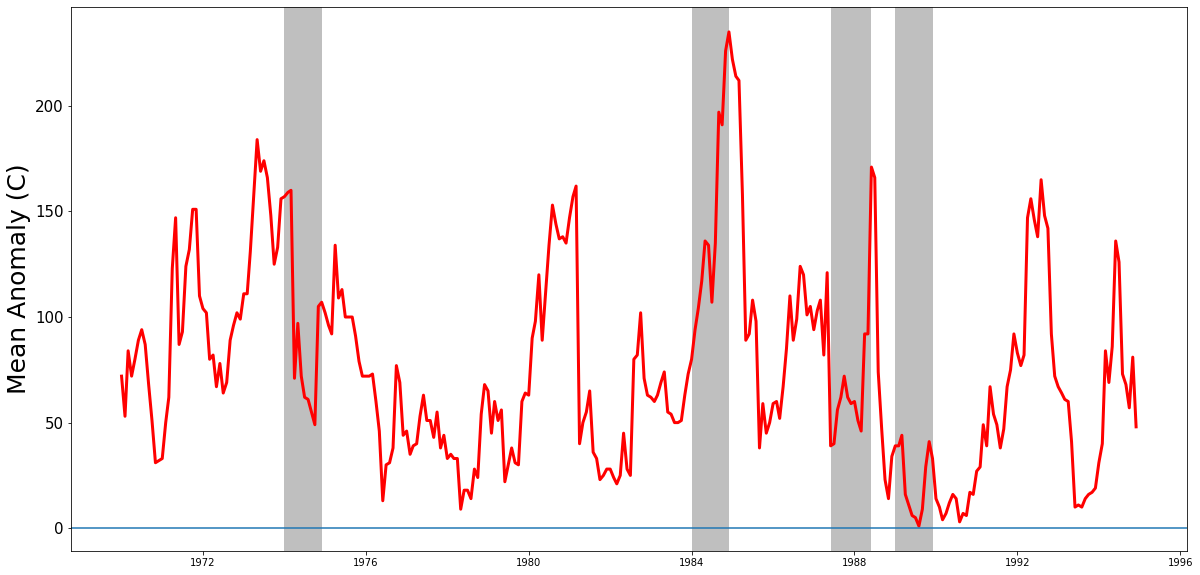

In [225]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, drought, linewidth = 3, color = 'r')
plt.axvspan('1974-01', '1974-12', facecolor='grey', alpha=0.5)
plt.axvspan('1984-01', '1984-12', facecolor='grey', alpha=0.5)
plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

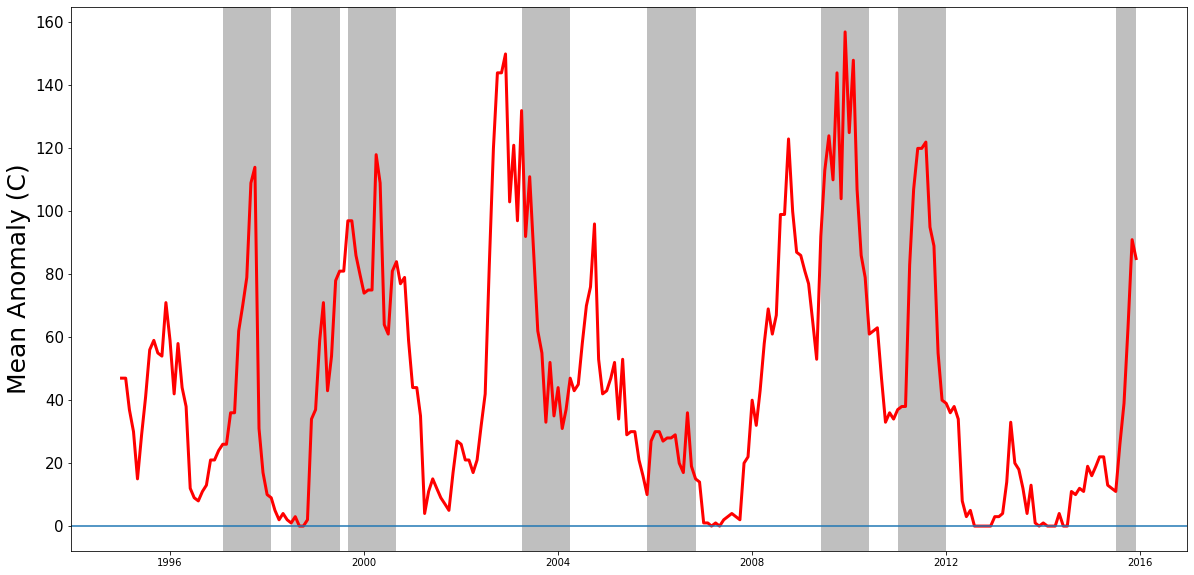

In [227]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, drought,linewidth = 3, color = 'r')
plt.axvspan('1997-02', '1998-02', facecolor='grey', alpha=0.5)
plt.axvspan('1998-07', '1999-07', facecolor='grey', alpha=0.5)
plt.axvspan('1999-09', '2000-09', facecolor='grey', alpha=0.5)
plt.axvspan('2003-04', '2004-04', facecolor='grey', alpha=0.5)
plt.axvspan('2005-11', '2006-11', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '2009-01', facecolor='grey', alpha=0.5)
plt.axvspan('2009-06', '2010-06', facecolor='grey', alpha=0.5)
plt.axvspan('2011-01', '2012-01', facecolor='grey', alpha=0.5)
plt.axvspan('2015-07', '2015-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

# ET

In [35]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

In [36]:
sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

In [37]:
d = result[:,index_result].mean(1)

In [38]:
d = uni_deseasonalize(d)

In [27]:
enso = ff.timeseries_enso('oni.npy',1950,2015,1950)

In [19]:
len(d) - len(enso)

240

In [23]:
st.pearsonr(enso,d[240:])

(0.11904015676038675, 0.0007886774237698756)

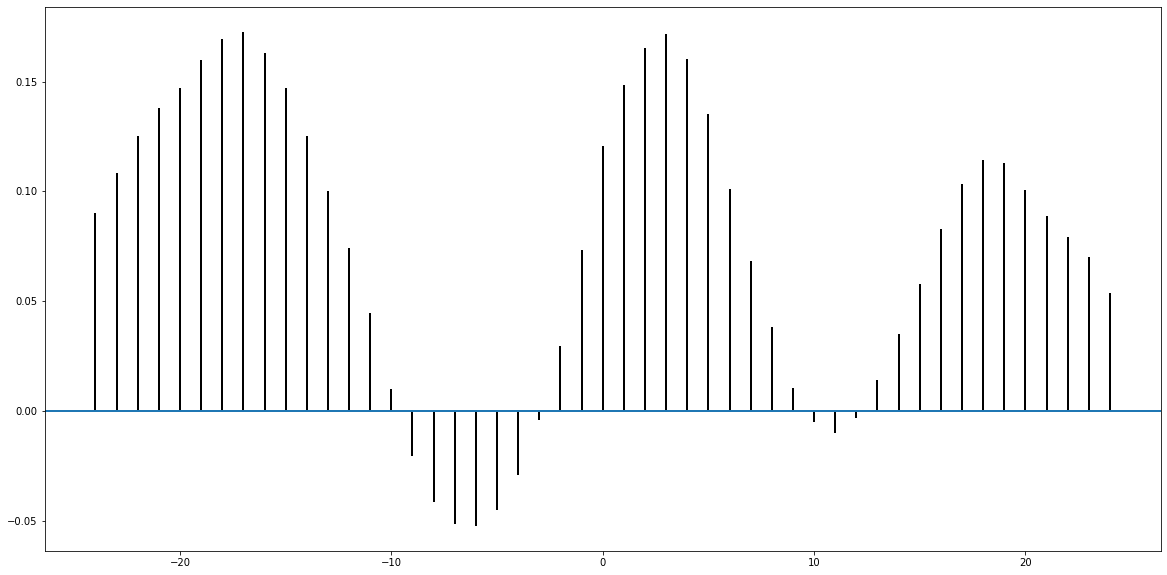

In [30]:
plt.xcorr(enso,d[240:],usevlines=True, maxlags=24, normed=True, lw=2);

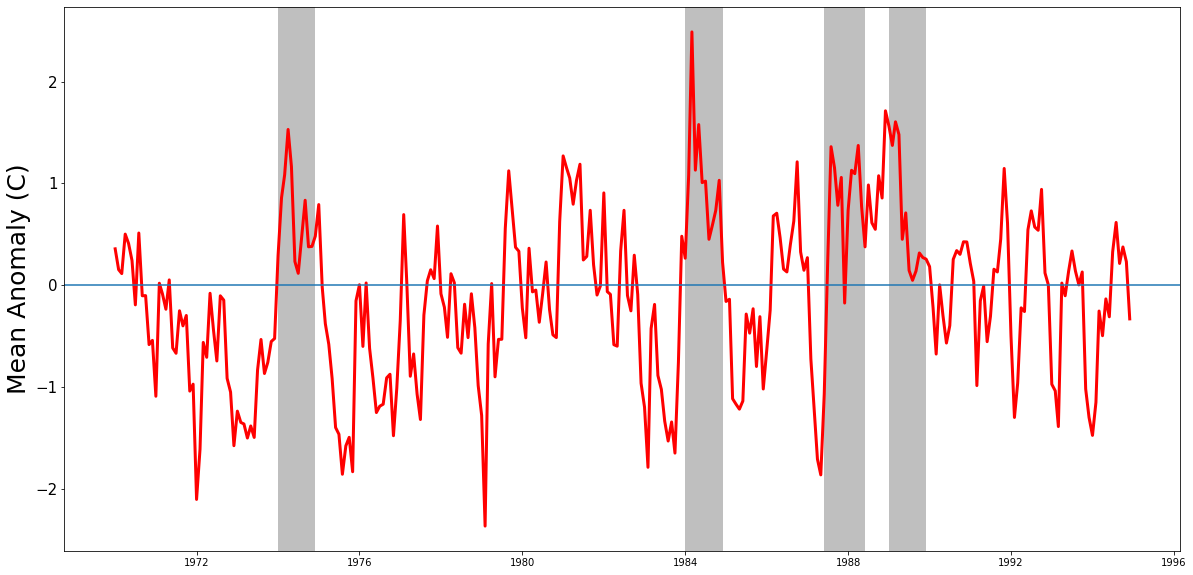

In [40]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1974-01', '1974-12', facecolor='grey', alpha=0.5)
plt.axvspan('1984-01', '1984-12', facecolor='grey', alpha=0.5)
plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("SST Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


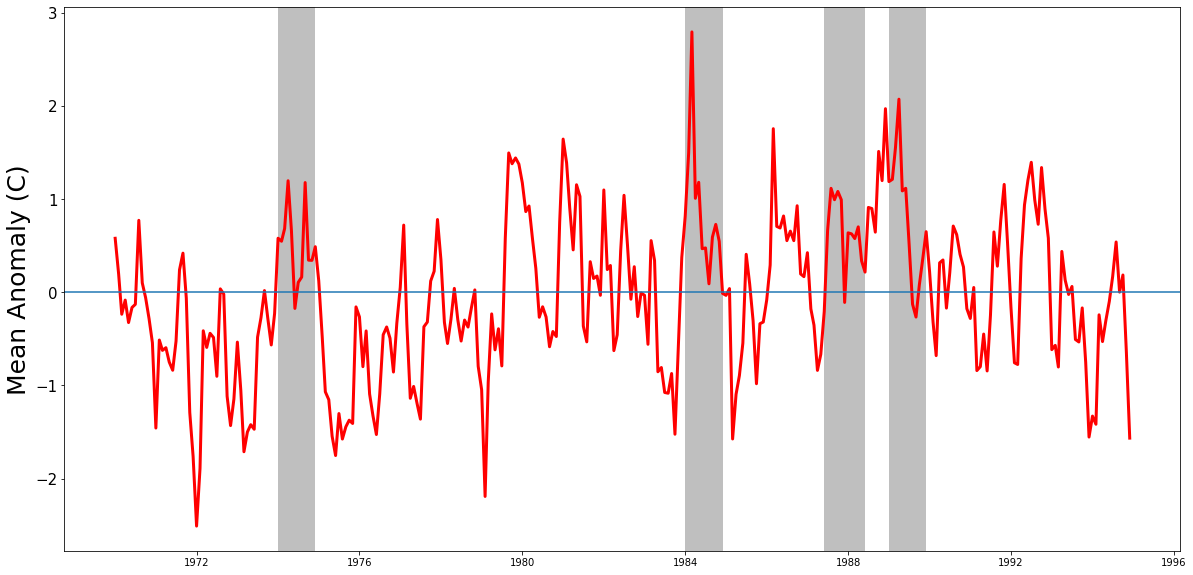

In [28]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1974-01', '1974-12', facecolor='grey', alpha=0.5)
plt.axvspan('1984-01', '1984-12', facecolor='grey', alpha=0.5)
plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

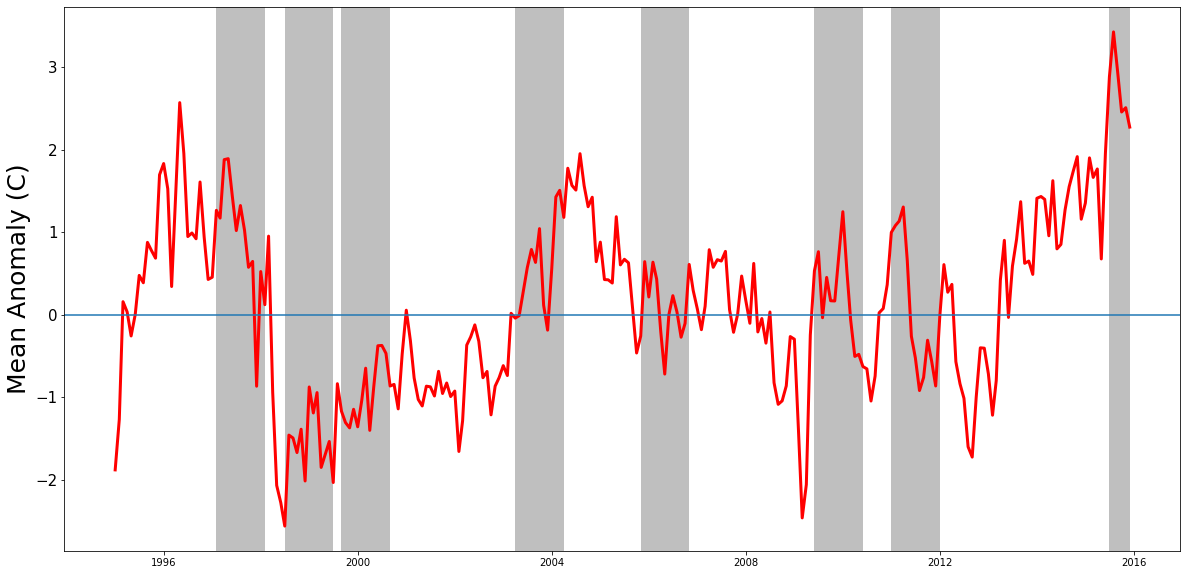

In [29]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[780:],linewidth = 3, color = 'r')
plt.axvspan('1997-02', '1998-02', facecolor='grey', alpha=0.5)
plt.axvspan('1998-07', '1999-07', facecolor='grey', alpha=0.5)
plt.axvspan('1999-09', '2000-09', facecolor='grey', alpha=0.5)
plt.axvspan('2003-04', '2004-04', facecolor='grey', alpha=0.5)
plt.axvspan('2005-11', '2006-11', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '2009-01', facecolor='grey', alpha=0.5)
plt.axvspan('2009-06', '2010-06', facecolor='grey', alpha=0.5)
plt.axvspan('2011-01', '2012-01', facecolor='grey', alpha=0.5)
plt.axvspan('2015-07', '2015-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

In [43]:
enso = ff.timeseries_enso('oni.npy',1970,1994,1950)

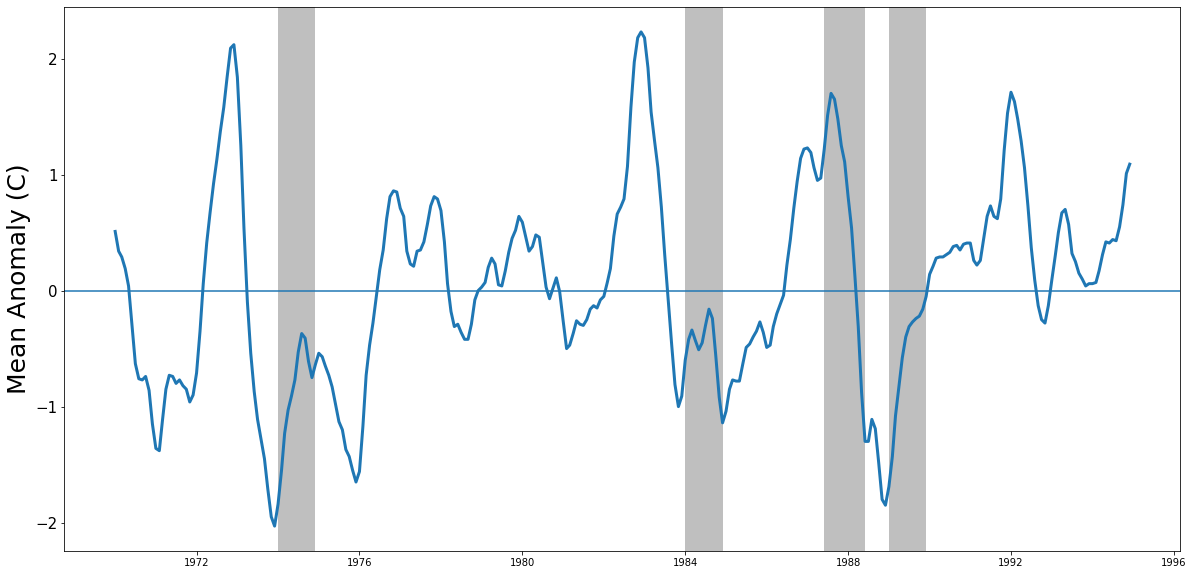

In [44]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, enso, linewidth = 3)
plt.axvspan('1974-01', '1974-12', facecolor='grey', alpha=0.5)
plt.axvspan('1984-01', '1984-12', facecolor='grey', alpha=0.5)
plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

In [45]:
enso = ff.timeseries_enso('oni.npy',1995,2015,1950)

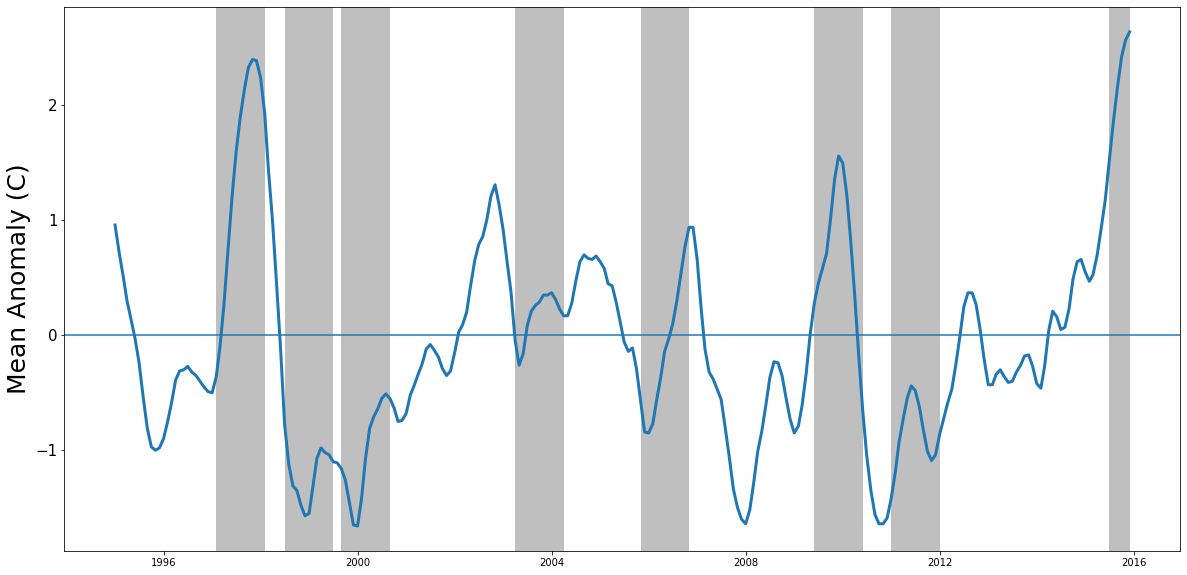

In [46]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, enso,linewidth = 3)
#plt.plot(x, d[780:],linewidth = 3)
plt.axvspan('1997-02', '1998-02', facecolor='grey', alpha=0.5)
plt.axvspan('1998-07', '1999-07', facecolor='grey', alpha=0.5)
plt.axvspan('1999-09', '2000-09', facecolor='grey', alpha=0.5)
plt.axvspan('2003-04', '2004-04', facecolor='grey', alpha=0.5)
plt.axvspan('2005-11', '2006-11', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '2009-01', facecolor='grey', alpha=0.5)
plt.axvspan('2009-06', '2010-06', facecolor='grey', alpha=0.5)
plt.axvspan('2011-01', '2012-01', facecolor='grey', alpha=0.5)
plt.axvspan('2015-07', '2015-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.savefig("enso_areas_1996_2015.png");

In [72]:
enso = ff.timeseries_enso('oni.npy',1970,1994,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


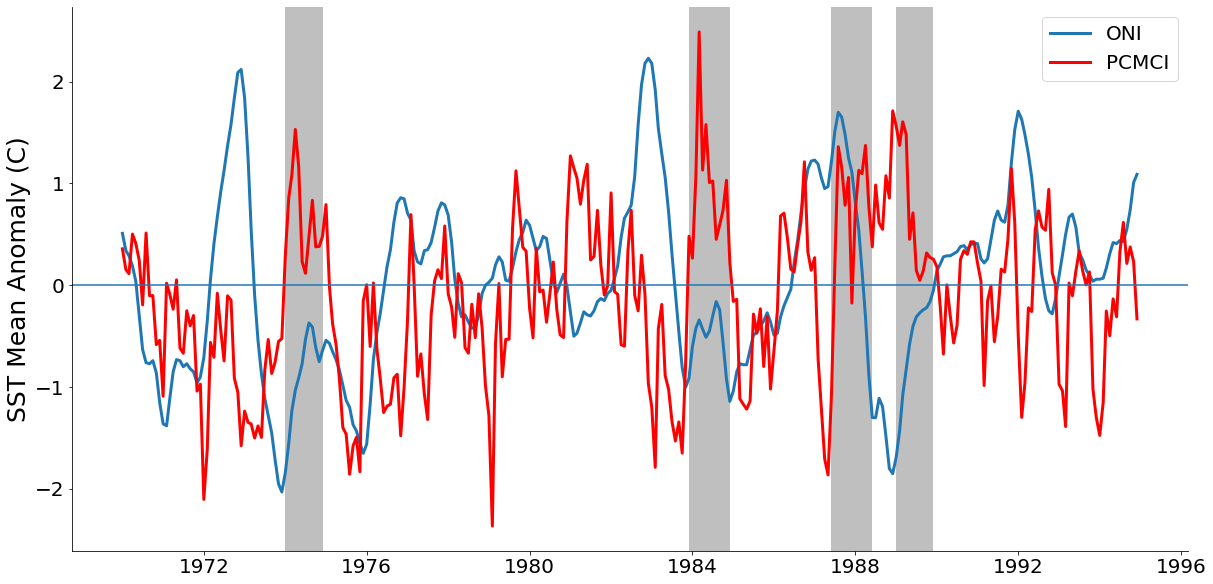

In [73]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, enso, linewidth = 3,label="ONI")
plt.plot(x, d[480:780], linewidth = 3, color = 'r', label = "PCMCI")
plt.axvspan('1974-01', '1974-12', facecolor='grey', alpha=0.5)
plt.axvspan('1983-12', '1984-12', facecolor='grey', alpha=0.5)
plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("SST Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("combined_areas_1970_1995.png");

In [74]:
enso = ff.timeseries_enso('oni.npy',1995,2015,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


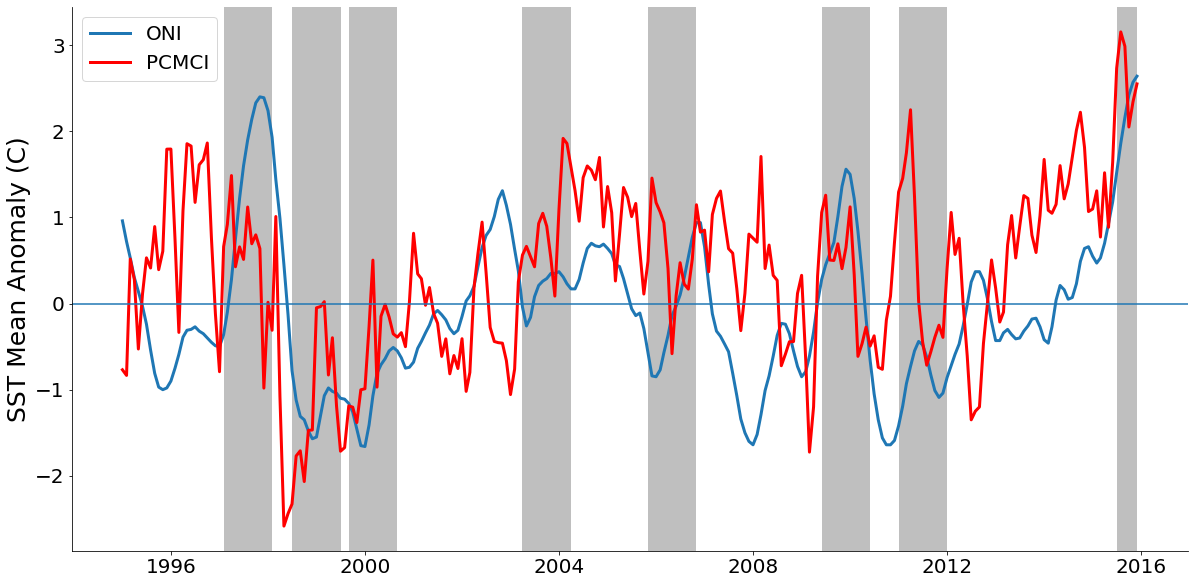

In [75]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, enso,linewidth = 3,label="ONI")
plt.plot(x, d[780:],linewidth = 3, color = 'r', label = "PCMCI")
plt.axvspan('1997-02', '1998-02', facecolor='grey', alpha=0.5)
plt.axvspan('1998-07', '1999-07', facecolor='grey', alpha=0.5)
plt.axvspan('1999-09', '2000-09', facecolor='grey', alpha=0.5)
plt.axvspan('2003-04', '2004-04', facecolor='grey', alpha=0.5)
plt.axvspan('2005-11', '2006-11', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '2009-01', facecolor='grey', alpha=0.5)
plt.axvspan('2009-06', '2010-06', facecolor='grey', alpha=0.5)
plt.axvspan('2011-01', '2012-01', facecolor='grey', alpha=0.5)
plt.axvspan('2015-07', '2015-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("SST Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("combined_areas_1996_2015.png");

# ZW

In [23]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

d = result[:,index_result].mean(1)

d = uni_deseasonalize(d)

In [24]:
corr = d.copy()

In [ ]:
dmi = ff.timeseries_enso('dmi.npy',1950,2015,1950)
enso = ff.timeseries_enso('oni.npy',1950,2015,1950)

In [75]:
st.pearsonr(corr[:-10],pcmci[10:])

(0.38142266607954556, 9.798546103017527e-37)

In [76]:
st.pearsonr(pcmci[:-10],corr[10:])

(0.41499339974610455, 8.2075791619870975e-44)

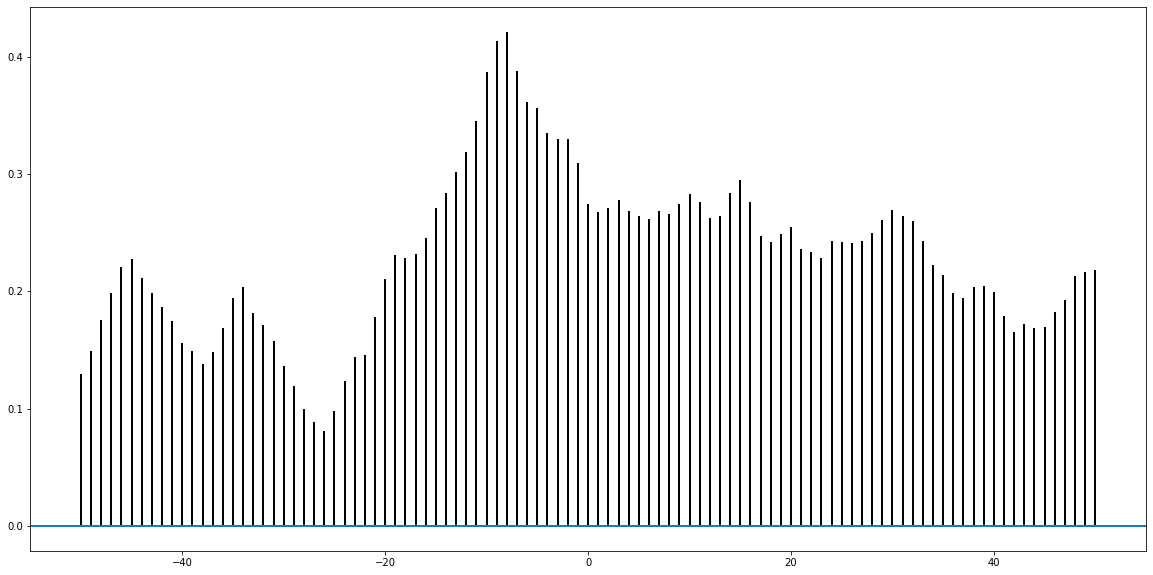

In [86]:
plt.xcorr(pcmci[:-480],corr[:-480],usevlines=True, maxlags=50, normed=True, lw=2);

In [45]:
st.pearsonr(dmi,pcmci[240:])

(0.21751274621749211, 6.175175523264145e-10)

(-0.1793802475659296, 3.744535038448764e-07)

In [56]:
st.pearsonr(pcmci[241:],enso[:-1])

(-0.18490829909001813, 1.62767301297241e-07)

In [60]:
st.pearsonr(pcmci[240:],dmi)

(0.21751274621749211, 6.175175523264145e-10)

In [59]:
st.pearsonr(pcmci[240:],enso)

(-0.1793802475659296, 3.744535038448764e-07)

In [49]:
st.pearsonr(enso,corr[240:])

(-0.39040334625764406, 3.0967941333410806e-30)

In [50]:
st.pearsonr(dmi,corr[240:])

(-0.004342408244781444, 0.9028881211911418)

In [33]:
len(corr[240:])

792

In [32]:
1032 - 792

240

(0.3681652382363613, 1.9086737593350222e-34)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


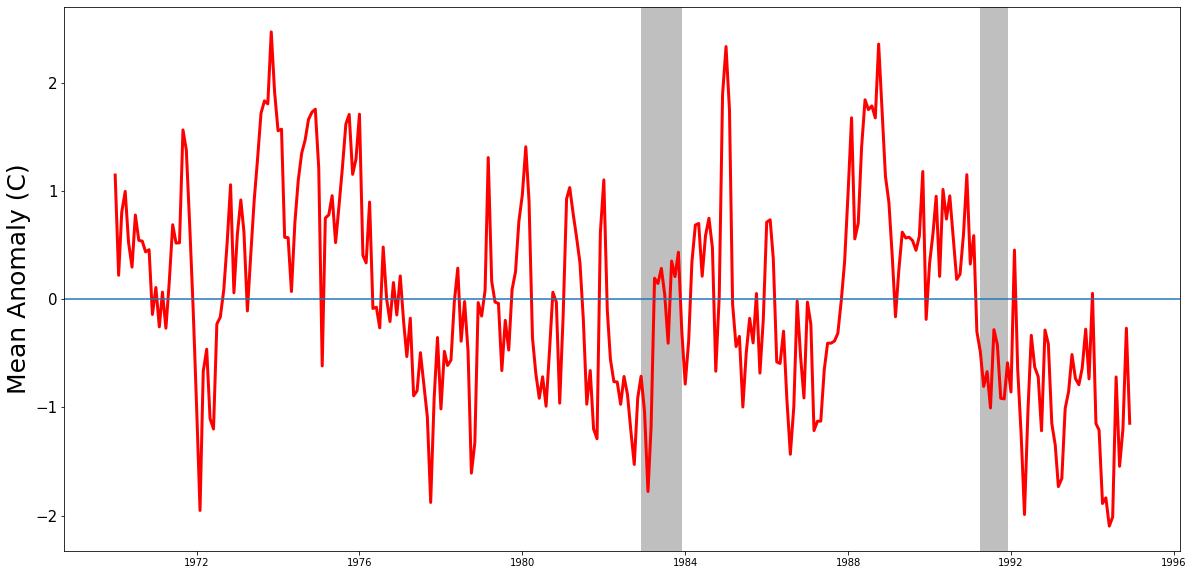

In [14]:
#CORR
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

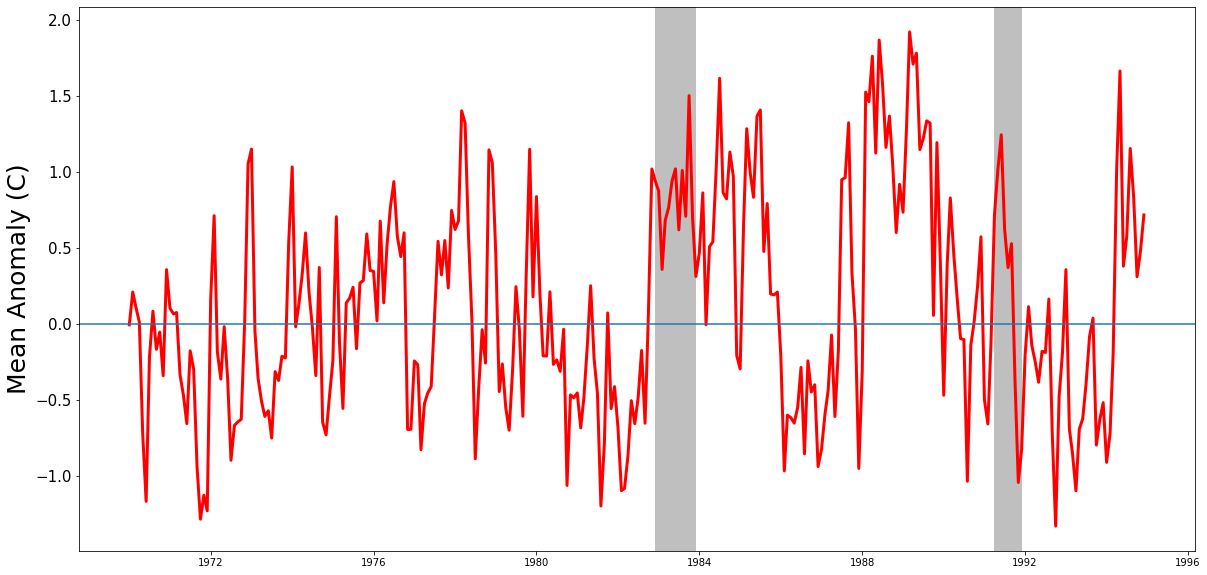

In [97]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995.png");

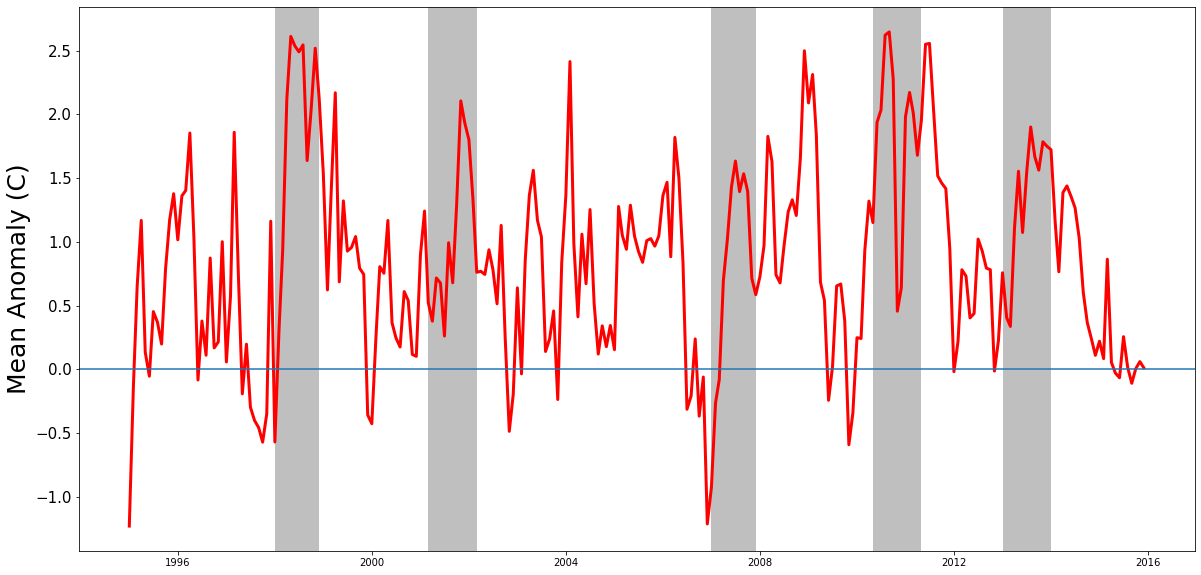

In [15]:
#CORR
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

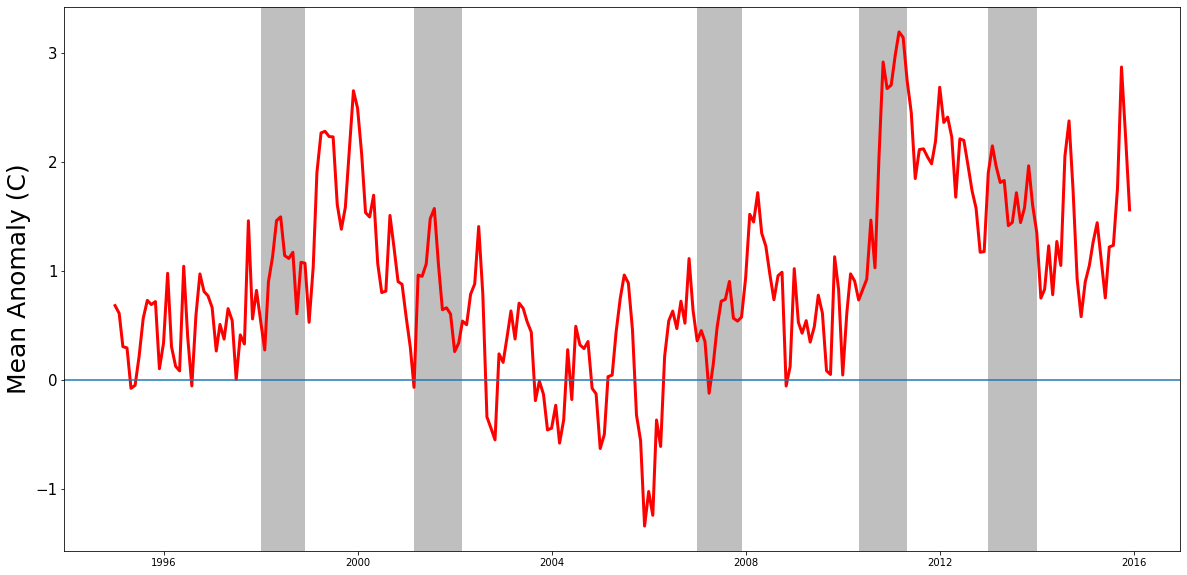

In [110]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

In [2]:
enso = ff.timeseries_enso('dmi.npy',1970,1994,1950)

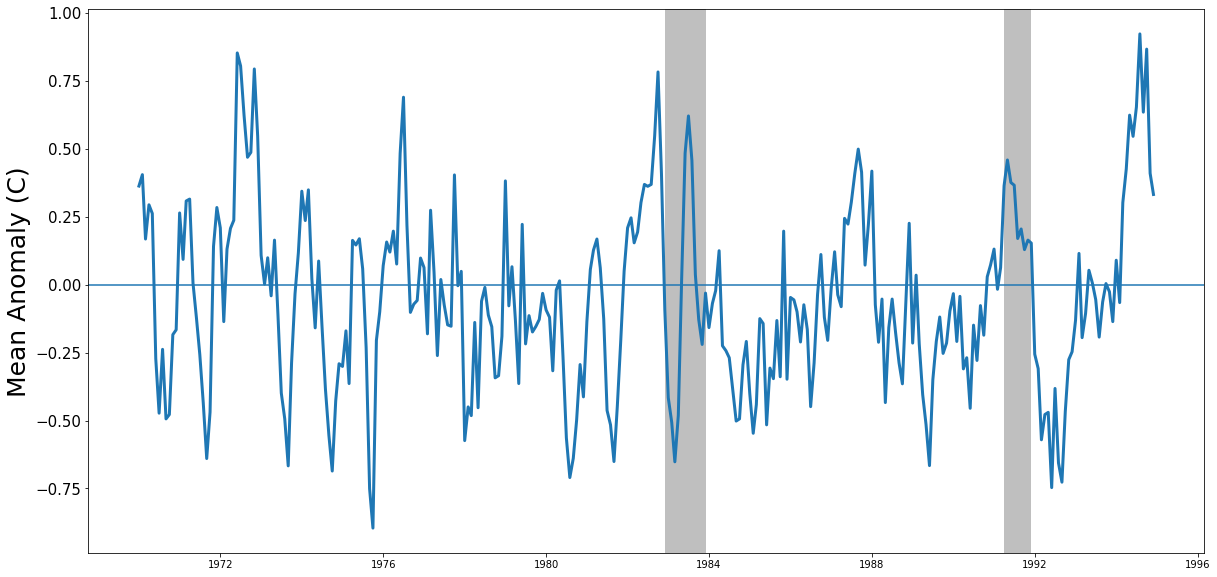

In [116]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, enso, linewidth = 3)
#plt.plot(x, d[480:780], linewidth = 3)
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("enso_areas_1970_1995.png");

In [117]:
enso = ff.timeseries_enso('DMI.npy',1995,2015,1950)

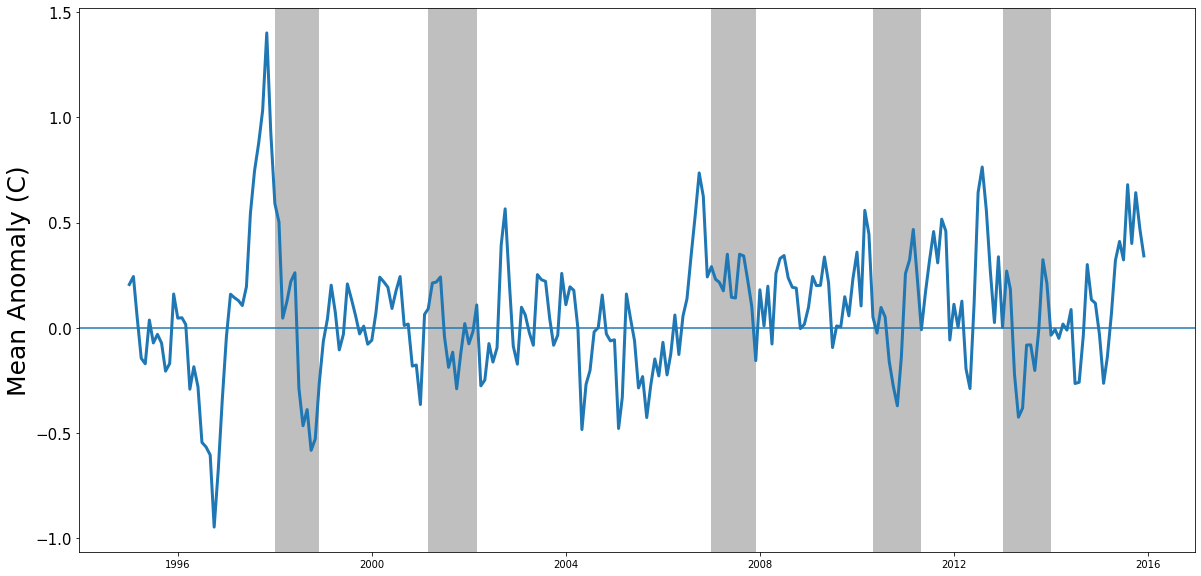

In [118]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, enso,linewidth = 3)
#plt.plot(x, d[780:],linewidth = 3)
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("enso_areas_1996_2015.png");